## Testing pair constructor class

In [20]:
from projLib.pair_constructor import PairConfiguration
from projLib.datasets import RealWorldIdentDataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import os
import json

In [10]:
config = PairConfiguration(["/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data/train.json"], "/home/lrabuzin/ETH/Sem3/sempro/BURST_annotations/info/categories.json", k=20, n=3)

/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/projLib/pair_constructor.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.raw_labels["n_content_objects"] = self._count_content_objects()


In [6]:
len(config.valid_labels)

6152

In [7]:
df = config.sample_pairs()
df["is_same_bg"] = df.apply(lambda row: os.path.dirname(row["image1"]) == os.path.dirname(row["image2"]), axis=1)
print(len(df))
print(df["is_same_bg"].sum())

3061
1290


In [21]:
dataset = RealWorldIdentDataset("/home/lrabuzin/ETH/Sem3/realworld_contrastive_learning/data", config.sample_pairs(), transform=ToTensor())

In [22]:
dataset[0]

{'image1': tensor([[[0.6275, 0.6275, 0.6275,  ..., 0.7804, 0.7804, 0.7843],
          [0.6314, 0.6314, 0.6314,  ..., 0.7804, 0.7804, 0.7843],
          [0.6353, 0.6353, 0.6353,  ..., 0.7804, 0.7804, 0.7843],
          ...,
          [0.4235, 0.4235, 0.4235,  ..., 0.4667, 0.4745, 0.4745],
          [0.4235, 0.4235, 0.4235,  ..., 0.4039, 0.4118, 0.4118],
          [0.4235, 0.4235, 0.4235,  ..., 0.3765, 0.3804, 0.3882]],
 
         [[0.5765, 0.5765, 0.5765,  ..., 0.8078, 0.8078, 0.8118],
          [0.5804, 0.5804, 0.5804,  ..., 0.8078, 0.8078, 0.8118],
          [0.5843, 0.5843, 0.5843,  ..., 0.8078, 0.8078, 0.8118],
          ...,
          [0.4078, 0.4078, 0.4078,  ..., 0.4118, 0.4196, 0.4196],
          [0.4078, 0.4078, 0.4078,  ..., 0.3490, 0.3569, 0.3569],
          [0.4078, 0.4078, 0.4078,  ..., 0.3216, 0.3255, 0.3333]],
 
         [[0.5098, 0.5098, 0.5098,  ..., 0.8471, 0.8471, 0.8510],
          [0.5137, 0.5137, 0.5137,  ..., 0.8471, 0.8471, 0.8510],
          [0.5176, 0.5176, 0.5

In [25]:
dataloader = DataLoader(dataset=dataset, batch_size=7)

In [27]:
r = next(iter(dataloader))

In [ ]:
content = r['content']

In [38]:
config.categories_decoder[95]

'bicycle'

In [4]:
import numpy as np
import json

In [5]:
with open("/home/lrabuzin/ETH/Sem3/sempro/BURST_annotations/info/categories.json", "r") as f:
    categories = json.load(f)

In [6]:
categories

[{'frequency': 'c',
  'id': 2,
  'synset': 'aerosol.n.02',
  'image_count': 1,
  'instance_count': 1,
  'synonyms': ['aerosol_can', 'spray_can'],
  'def': 'a dispenser that holds a substance under pressure',
  'name': 'aerosol_can'},
 {'frequency': 'f',
  'id': 4,
  'synset': 'airplane.n.01',
  'image_count': 87,
  'instance_count': 122,
  'synonyms': ['airplane', 'aeroplane'],
  'def': 'an aircraft that has a fixed wing and is powered by propellers or jets',
  'name': 'airplane'},
 {'frequency': 'r',
  'id': 16,
  'synset': 'apricot.n.02',
  'image_count': 0,
  'instance_count': 0,
  'synonyms': ['apricot'],
  'def': 'downy yellow to rosy-colored fruit resembling a small peach',
  'name': 'apricot'},
 {'frequency': 'f',
  'id': 17,
  'synset': 'apron.n.01',
  'image_count': 24,
  'instance_count': 44,
  'synonyms': ['apron'],
  'def': 'a garment of cloth that is tied about the waist and worn to protect clothing',
  'name': 'apron'},
 {'frequency': 'f',
  'id': 20,
  'synset': 'armchai

In [7]:
from projLib.pair_constructor import PairConstructor

In [8]:
constructor_classes = PairConstructor("/home/lrabuzin/ETH/Sem3/sempro/train.json", "/home/lrabuzin/ETH/Sem3/sempro/BURST_annotations/info/categories.json", k=20, n=3)
# constructor_instances = PairConstructor("/home/lrabuzin/ETH/Sem3/sempro/train.json", count_instances=True, k=20, n=3)

KeyboardInterrupt: 

In [ ]:
# constructor_classes.viable_images["list_object"].apply(lambda x: frozenset(filter(lambda t: t in constructor_classes.content_classes, x))).unique()

array([frozenset({347, 805, 126}), frozenset({1128, 229, 805}),
       frozenset({1144, 211, 174}), frozenset({211, 805, 174}),
       frozenset({1144, 211, 805}), frozenset({211, 805, 95}),
       frozenset({1128, 805, 133}), frozenset({1128, 347, 805}),
       frozenset({817, 805, 126}), frozenset({805, 229, 211}),
       frozenset({1144, 805, 174}), frozenset({347, 805, 133}),
       frozenset({347, 235, 805}), frozenset({817, 805, 382}),
       frozenset({382, 805, 126}), frozenset({229, 805, 382}),
       frozenset({235, 805, 133}), frozenset({1128, 235, 805}),
       frozenset({235, 805, 382}), frozenset({1128, 805, 382}),
       frozenset({347, 805, 382}), frozenset({1128, 805, 126})],
      dtype=object)

In [ ]:
a = 0
for key, value in constructor_classes.combo_to_image.items():
    a += len(value)
print(a)

9039


In [ ]:
constructor_classes.viable_images["list_object"].apply(lambda x: frozenset(filter(lambda t: t in constructor_classes.content_classes, x))).unique()

array([frozenset({347, 805, 126}), frozenset({1128, 229, 805}),
       frozenset({1144, 211, 174}), frozenset({211, 805, 174}),
       frozenset({1144, 211, 805}), frozenset({211, 805, 95}),
       frozenset({1128, 805, 133}), frozenset({1128, 347, 805}),
       frozenset({817, 805, 126}), frozenset({805, 229, 211}),
       frozenset({1144, 805, 174}), frozenset({347, 805, 133}),
       frozenset({347, 235, 805}), frozenset({817, 805, 382}),
       frozenset({382, 805, 126}), frozenset({229, 805, 382}),
       frozenset({235, 805, 133}), frozenset({1128, 235, 805}),
       frozenset({235, 805, 382}), frozenset({1128, 805, 382}),
       frozenset({347, 805, 382}), frozenset({1128, 805, 126})],
      dtype=object)

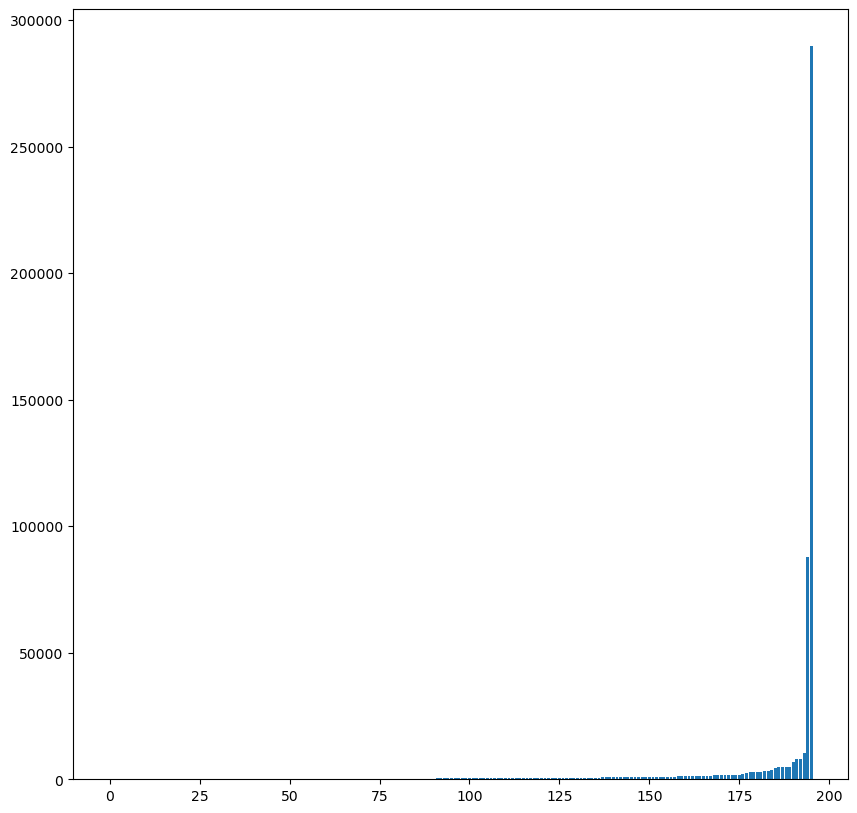

In [ ]:
constructor_classes.plot_class_distribution()

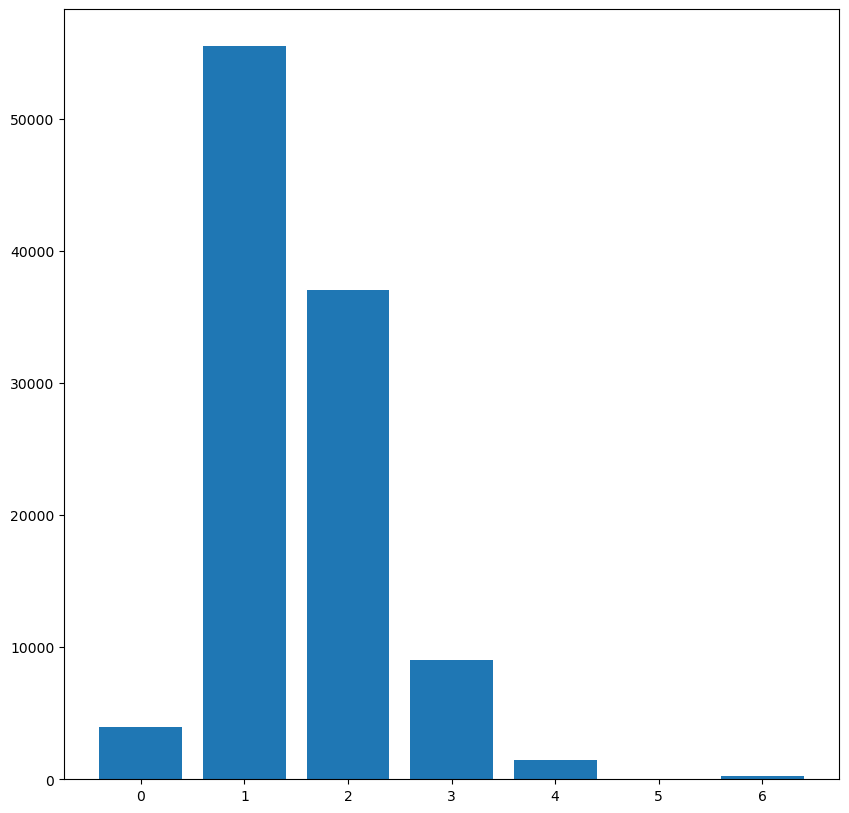

In [ ]:
constructor_classes.plot_content_object_number()

In [ ]:
constructor_classes.sorted_content_combination_frequencies[82]

2

In [ ]:
np.unique(constructor_classes.all_content_combinations, return_counts=True)

(array([frozenset({347, 805, 126}), frozenset({235, 805, 133}),
        frozenset({1128, 235, 805}), frozenset({235, 805, 133}),
        frozenset({1128, 235, 805}), frozenset({235, 805, 133}),
        frozenset({1128, 235, 805}), frozenset({235, 805, 133}),
        frozenset({1128, 235, 805}), frozenset({235, 805, 133}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({805, 347, 133}), frozenset({235, 805, 133}),
        frozenset({805, 347, 133}), frozenset({235, 805, 133}),
        frozenset({805, 347, 133}), frozenset({1128, 235, 805}),
        frozenset({805, 347, 133}), frozenset({229, 805, 382}),
        frozenset({1128, 235, 805}), frozenset({235, 805, 382}),
        frozenset({1128, 805, 382}

In [ ]:
print(len(set(constructor_classes.sorted_content_combinations)))

22


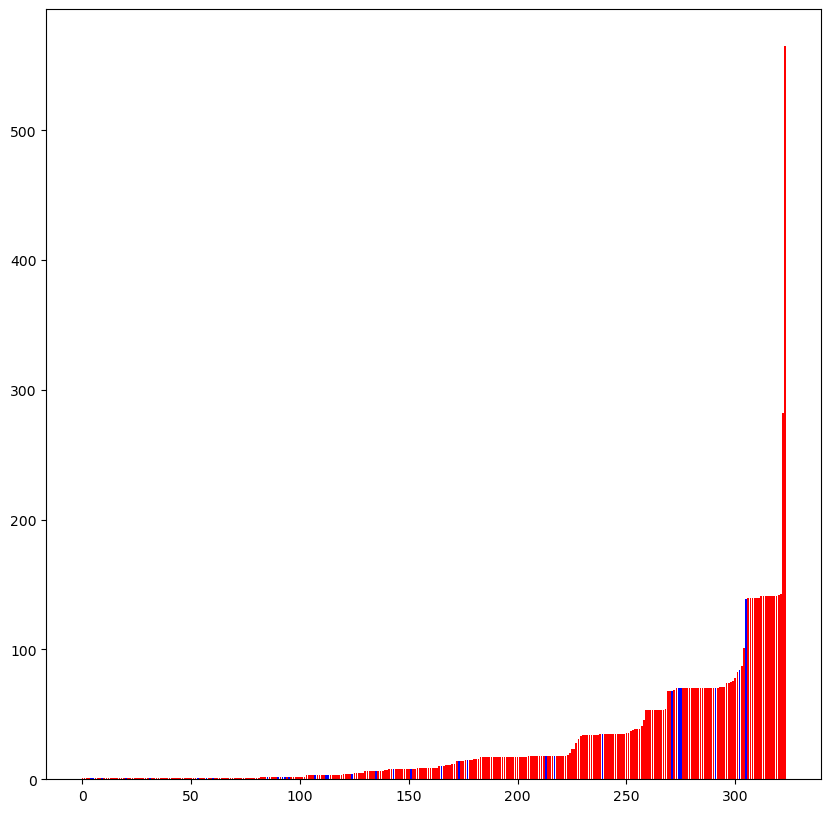

[frozenset({347, 805, 133}) frozenset({1144, 211, 805})]
[282 565]
9039


In [ ]:
constructor_classes.plot_most_frequent_content_combinations(log_scale=False, color_red = 805)
overwhelming_combos = constructor_classes.sorted_content_combinations[-2:]
print(constructor_classes.sorted_content_combinations[-2:])
print(constructor_classes.sorted_content_combination_frequencies[-2:])
print(len(constructor_classes.all_content_combinations))


In [ ]:
[(category['id'], category['synset']) for category in categories if (category["id"] in overwhelming_combos[0] or category["id"] in overwhelming_combos[1])]

[(133, 'bottle.n.01'),
 (211, 'car.n.01'),
 (347, 'cup.n.01'),
 (805, 'person.n.01'),
 (1144, 'truck.n.01')]

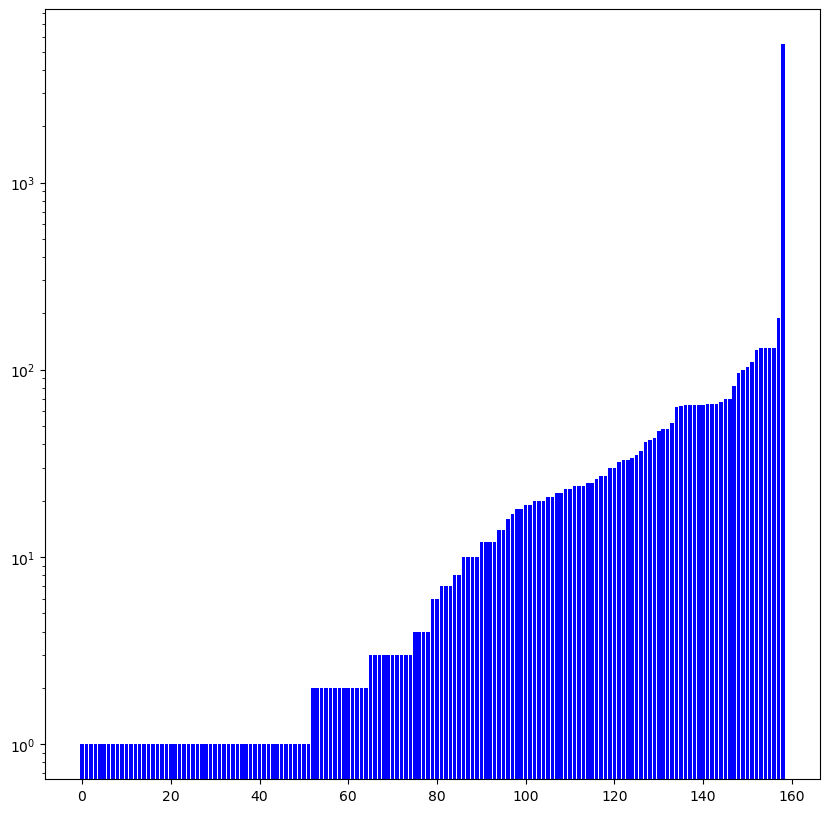

In [ ]:
constructor_classes.plot_most_frequent_style_combinations(log_scale=True, color_red=0)

In [ ]:
print(constructor_classes.sorted_style_combinations[-2:])
print(constructor_classes.sorted_style_combination_frequencies[-2:])

[frozenset({990}) frozenset()]
[ 189 5475]


In [ ]:
[(category['id'], category['synonyms']) for category in categories if category["id"] == 990]

[(990, ['slipper_(footwear)', 'carpet_slipper_(footwear)'])]

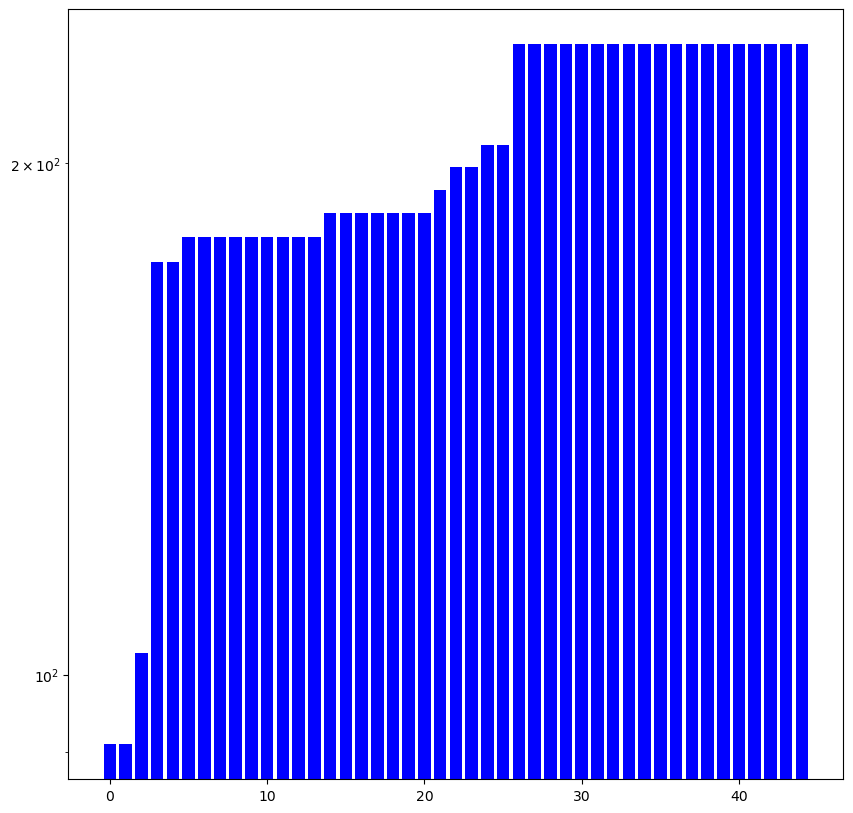

In [ ]:
constructor_classes.plot_most_frequent_values(constructor_classes.sorted_background_frequencies, constructor_classes.sorted_backgrounds, color_red=0)

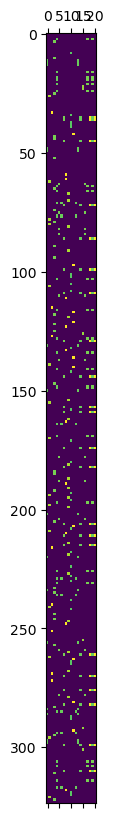

In [ ]:
style_classes = constructor_classes.plot_co_occurence_content_style()

In [ ]:
[(category['id'], category['synonyms']) for category in categories if category["id"] in style_classes]

[(110, ['blanket']),
 (129, ['booklet', 'brochure', 'leaflet', 'pamphlet']),
 (160, ['bucket', 'pail']),
 (208, ['bottle_cap', 'cap_(container_lid)']),
 (224, ['carton']),
 (237, ['chair']),
 (290, ['coffeepot']),
 (352, ['curtain', 'drapery']),
 (355, ['cutting_tool']),
 (395, ['drawer']),
 (604, ['jeep', 'landrover']),
 (714, ['motorcycle']),
 (754, ['packet']),
 (793, ['pen']),
 (926, ['sandwich']),
 (990, ['slipper_(footwear)', 'carpet_slipper_(footwear)']),
 (1001, ['sofa', 'couch', 'lounge']),
 (1062, ['sweater']),
 (1092, ['telephone', 'phone', 'telephone_set']),
 (1125, ['cover']),
 (1213, ['wine_bottle'])]

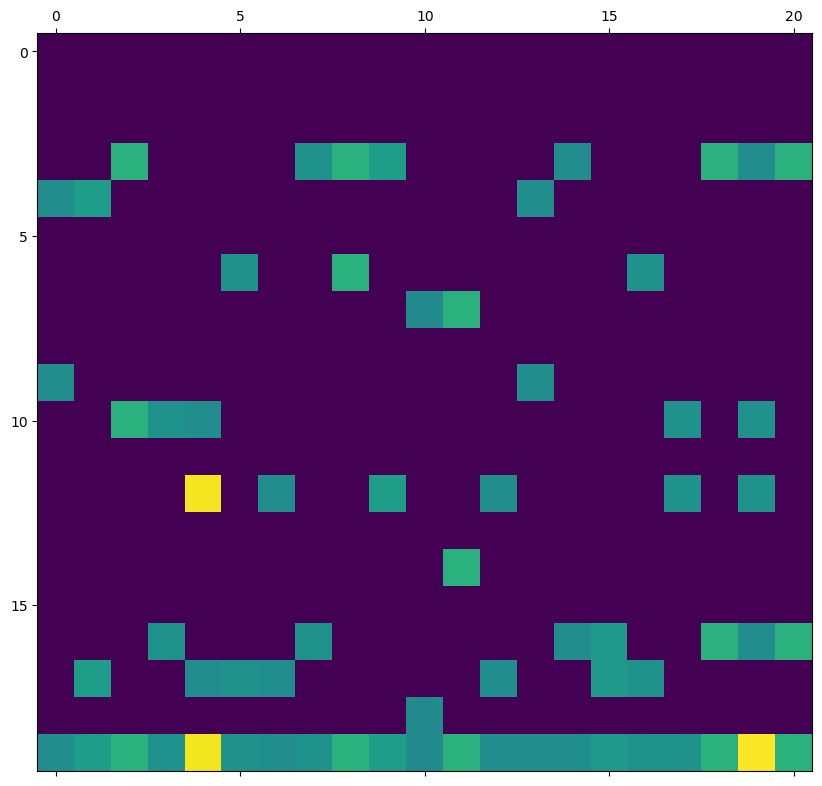

Int64Index([ 110,  129,  160,  208,  224,  237,  290,  352,  355,  395,  604,
             714,  754,  793,  926,  990, 1001, 1062, 1092, 1125, 1213],
           dtype='int64')


In [ ]:
constructor_classes.plot_single_content_style_co_occurence()

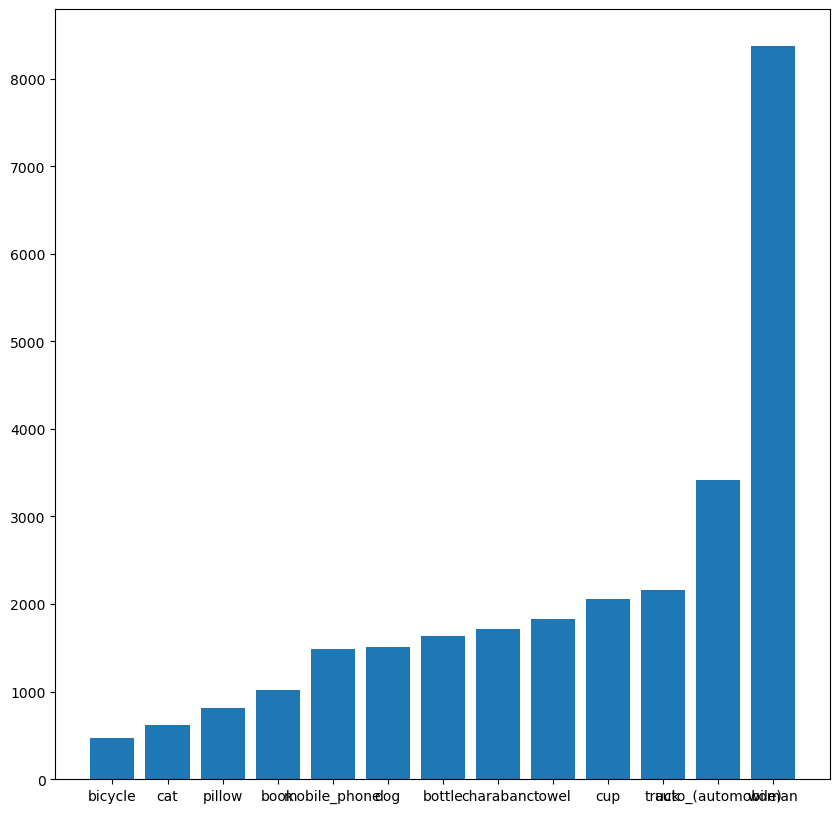

In [ ]:
constructor_classes.plot_viable_content_class_distribution()

In [ ]:
constructor_classes.style_classes

array([   2,    4,   16,   31,   32,   34,   35,   36,   38,   58,   60,
         74,   79,   80,   91,  110,  118,  129,  136,  139,  152,  156,
        160,  162,  176,  190,  191,  194,  197,  202,  208,  221,  224,
        237,  262,  266,  267,  289,  290,  302,  314,  336,  341,  342,
        352,  355,  356,  363,  373,  380,  395,  398,  405,  416,  422,
        428,  436,  437,  446,  458,  475,  495,  500,  502,  510,  531,
        533,  550,  554,  561,  572,  595,  601,  604,  611,  625,  627,
        633,  637,  641,  642,  644,  645,  651,  664,  676,  690,  697,
        707,  709,  713,  714,  726,  728,  732,  754,  757,  771,  780,
        792,  793,  804,  807,  811,  812,  821,  824,  825,  835,  850,
        868,  875,  876,  882,  896,  897,  914,  926,  932,  936,  937,
        938,  940,  942,  944,  953,  957,  960,  961,  965,  966,  969,
        972,  980,  982,  985,  987,  990,  996, 1001, 1012, 1014, 1016,
       1017, 1018, 1021, 1040, 1045, 1056, 1057, 10

In [ ]:
constructor_classes.sorted_content_combinations

array([frozenset({347, 805, 126}), frozenset({1144, 211, 805}),
       frozenset({235, 805, 133}), frozenset({805, 347, 133}),
       frozenset({1144, 211, 174}), frozenset({1144, 211, 174}),
       frozenset({1144, 211, 805}), frozenset({1144, 211, 805}),
       frozenset({211, 805, 174}), frozenset({1144, 211, 174}),
       frozenset({805, 347, 133}), frozenset({817, 805, 126}),
       frozenset({817, 805, 126}), frozenset({817, 805, 126}),
       frozenset({1144, 211, 805}), frozenset({1128, 805, 382}),
       frozenset({235, 805, 133}), frozenset({1128, 805, 126}),
       frozenset({235, 805, 133}), frozenset({235, 805, 133}),
       frozenset({1144, 211, 174}), frozenset({235, 805, 133}),
       frozenset({347, 805, 382}), frozenset({347, 805, 382}),
       frozenset({235, 805, 133}), frozenset({347, 805, 133}),
       frozenset({817, 805, 382}), frozenset({382, 805, 126}),
       frozenset({382, 805, 126}), frozenset({1128, 805, 126}),
       frozenset({1144, 211, 805}), frozense

In [ ]:
import functools
all_appearing_classes = set(functools.reduce(lambda a,b: a.union(b), constructor_classes.sorted_content_combinations))

In [ ]:
len(all_appearing_classes)

13